# YOLO (You Only look One)
Real-time object detection is often used as a key component in computer vision systems. Applications that use real-time object detection models include video analytics, robotics, autonomous vehicles, multi-object tracking and object counting, medical image analysis, and many others.

https://arxiv.org/pdf/1506.02640


# YOLO8
Ultralytics YOLOv8 is a cutting-edge, state-of-the-art (SOTA) model that builds upon the success of previous YOLO versions and introduces new features and improvements to further boost performance and flexibility. YOLOv8 is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and tracking, instance segmentation, image classification and pose estimation tasks.

https://github.com/ultralytics/ultralytics

# YOLO9
YOLOv9 marks a significant advancement in real-time object detection, introducing groundbreaking techniques such as Programmable Gradient Information (PGI) and the Generalized Efficient Layer Aggregation Network (GELAN)

- https://github.com/WongKinYiu/yolov9
- https://arxiv.org/abs/2402.13616

# 

# YOLO10  Real-Time End-to-End Object Detection
Real-time object detection aims to accurately predict object categories and positions in images with low latency. The YOLO series has been at the forefront of this research due to its balance between performance and efficiency. However, reliance on NMS and architectural inefficiencies have hindered optimal performance. YOLOv10 addresses these issues by introducing consistent dual assignments for NMS-free training and a holistic efficiency-accuracy driven model design strategy.

- https://github.com/THU-MIG/yolov10/tree/main?tab=readme-ov-file#performance
- https://arxiv.org/pdf/2405.1
- https://blog.paperspace.com/yolov10-advanced-real-time-end-to-end-object-detection/

During the assignment of predictions to ground truth instances, both one-to-one and one-to-many approaches use a metric to measure how well a prediction matches an instance. This metric combines the classification score, the bounding box overlap (IoU), and whether the prediction’s anchor point is within the instance.

A consistent matching metric improves both the one-to-one and one-to-many matching processes, ensuring both branches optimize towards the same goal. This dual approach allows for richer supervisory signals from the one-to-many branch while maintaining efficient inference from the one-to-one branch.

The consistent matching metric ensures that the best positive sample (the prediction that best matches the instance) is the same for both the one-to-one and one-to-many branches. This is achieved by making the parameters (α and β) that control the balance between classification and localization tasks proportional between the two branches.4458

# NNCF Neural Network Compression Framework (NNCF)
Neural Network Compression Framework (NNCF) provides a suite of post-training and training-time algorithms for optimizing inference of neural networks in OpenVINO with a minimal accuracy drop 

https://github.com/openvinotoolkit/nncf


# Links
- https://www.datacamp.com/blog/yolo-object-detection-explained
- https://docs.ultralytics.com/tasks/
- https://docs.ultralytics.com/modes/predict/

In [2]:
import os

os.environ["GIT_CLONE_PROTECTION_ACTIVE"] = "false"

%pip install -q "nncf>=2.11.0"
# %pip install -Uq "openvino>=2024.3.0"
%pip install -q "git+https://github.com/THU-MIG/yolov10.git" --extra-index-url https://download.pytorch.org/whl/cpu
# %pip install -q "torch>=2.1" "torchvision>=0.16" tqdm opencv-python "gradio>=4.19" --extra-index-url https://download.pytorch.org/whl/cpu

Note: you may need to restart the kernel to use updated packages.


In [1]:
from pathlib import Path

# Fetch `notebook_utils` module
import requests

r = requests.get(
    url="https://raw.githubusercontent.com/openvinotoolkit/openvino_notebooks/latest/utils/notebook_utils.py",
)

open("notebook_utils.py", "w").write(r.text)

from notebook_utils import download_file, VideoPlayer, device_widget

# Download Pytorch Model
https://github.com/THU-MIG/yolov10/tree/main?tab=readme-ov-file#performance

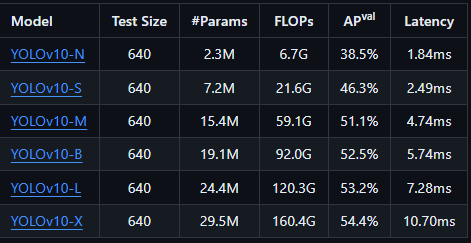

In [2]:
models_dir = Path("./models")
models_dir.mkdir(exist_ok=True)

In [3]:
model_weights_url = "https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10x.pt"
file_name = model_weights_url.split("/")[-1]
model_name = file_name.replace(".pt", "")

download_file(model_weights_url, directory=models_dir)

'models\yolov10x.pt' already exists.


WindowsPath('D:/repos/openvino/models/yolov10x.pt')

# Export PyTorch model to OpenVINO IR Format

In [4]:
import types
from ultralytics.utils import ops, yaml_load, yaml_save
from ultralytics import YOLOv10
import torch

detection_labels = {
    0: "person",
    1: "bicycle",
    2: "car",
    3: "motorcycle",
    4: "airplane",
    5: "bus",
    6: "train",
    7: "truck",
    8: "boat",
    9: "traffic light",
    10: "fire hydrant",
    11: "stop sign",
    12: "parking meter",
    13: "bench",
    14: "bird",
    15: "cat",
    16: "dog",
    17: "horse",
    18: "sheep",
    19: "cow",
    20: "elephant",
    21: "bear",
    22: "zebra",
    23: "giraffe",
    24: "backpack",
    25: "umbrella",
    26: "handbag",
    27: "tie",
    28: "suitcase",
    29: "frisbee",
    30: "skis",
    31: "snowboard",
    32: "sports ball",
    33: "kite",
    34: "baseball bat",
    35: "baseball glove",
    36: "skateboard",
    37: "surfboard",
    38: "tennis racket",
    39: "bottle",
    40: "wine glass",
    41: "cup",
    42: "fork",
    43: "knife",
    44: "spoon",
    45: "bowl",
    46: "banana",
    47: "apple",
    48: "sandwich",
    49: "orange",
    50: "broccoli",
    51: "carrot",
    52: "hot dog",
    53: "pizza",
    54: "donut",
    55: "cake",
    56: "chair",
    57: "couch",
    58: "potted plant",
    59: "bed",
    60: "dining table",
    61: "toilet",
    62: "tv",
    63: "laptop",
    64: "mouse",
    65: "remote",
    66: "keyboard",
    67: "cell phone",
    68: "microwave",
    69: "oven",
    70: "toaster",
    71: "sink",
    72: "refrigerator",
    73: "book",
    74: "clock",
    75: "vase",
    76: "scissors",
    77: "teddy bear",
    78: "hair drier",
    79: "toothbrush",

}


def v10_det_head_forward(self, x):
    one2one = self.forward_feat([xi.detach() for xi in x], self.one2one_cv2, self.one2one_cv3)
    if not self.export:
        one2many = super().forward(x)

    if not self.training:
        one2one = self.inference(one2one)
        if not self.export:
            return {"one2many": one2many, "one2one": one2one}
        else:
            assert self.max_det != -1
            boxes, scores, labels = ops.v10postprocess(one2one.permute(0, 2, 1), self.max_det, self.nc)
            return torch.cat(
                [boxes, scores.unsqueeze(-1), labels.unsqueeze(-1).to(boxes.dtype)],
                dim=-1,
            )
    else:
        return {"one2many": one2many, "one2one": one2one}


ov_model_path = models_dir / f"{model_name}_openvino_model/{model_name}.xml"
if not ov_model_path.exists():
    model = YOLOv10(models_dir / file_name)
    model.model.model[-1].forward = types.MethodType(v10_det_head_forward, model.model.model[-1])
    model.export(format="openvino", dynamic=True, half=True)
    config = yaml_load(ov_model_path.parent / "metadata.yaml")
    config["names"] = detection_labels
    yaml_save(ov_model_path.parent / "metadata.yaml", config)

Ultralytics YOLOv8.1.34 🚀 Python-3.11.9 torch-2.2.2+cpu CPU (Intel Core(TM) i7-10870H 2.20GHz)
YOLOv10x summary (fused): 503 layers, 31738160 parameters, 0 gradients

PyTorch: starting from 'models\yolov10x.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 300, 6) (122.3 MB)

OpenVINO: starting export with openvino 2024.2.0-15519-5c0f38f83f6-releases/2024/2...
OpenVINO: export success ✅ 37.0s, saved as 'models\yolov10x_openvino_model\' (57.1 MB)

Export complete (46.4s)
Results saved to D:\repos\openvino\models
Predict:         yolo predict task=detect model=models\yolov10x_openvino_model imgsz=640 half 
Validate:        yolo val task=detect model=models\yolov10x_openvino_model imgsz=640 data=None half 
Visualize:       https://netron.app


# Run OpenVINO Inference on AUTO device using Ultralytics API

In [139]:
ov_yolo_model = YOLOv10(ov_model_path.parent, task="detect")

In [140]:
from PIL import Image

IMAGE_PATH = Path("./data/coco_bike.jpg")
download_file(
    url="https://storage.openvinotoolkit.org/repositories/openvino_notebooks/data/data/image/coco_bike.jpg",
    filename=IMAGE_PATH.name,
    directory=IMAGE_PATH.parent,
)

'data\coco_bike.jpg' already exists.


WindowsPath('D:/repos/openvino/data/coco_bike.jpg')

Loading models\yolov10x_openvino_model for OpenVINO inference...
Using OpenVINO LATENCY mode for batch=1 inference...

image 1/1 D:\repos\openvino\data\coco_bike.jpg: 640x640 5 bicycles, 2 cars, 1 parking meter, 1 dog, 5437.2ms
Speed: 14.0ms preprocess, 5437.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


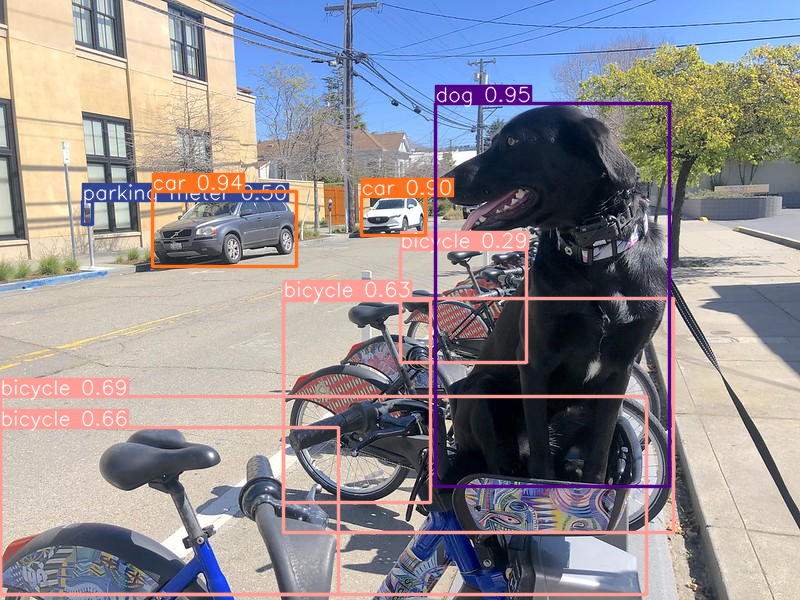

In [141]:
res = ov_yolo_model(IMAGE_PATH, iou=0.45, conf=0.2)
Image.fromarray(res[0].plot()[:, :, ::-1])

In [109]:
IMAGE_PATH2 = Path("./images/2008_000562.jpg")

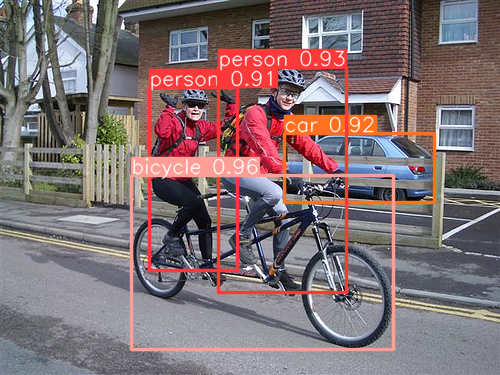

In [111]:
res = ov_yolo_model(IMAGE_PATH2, iou=0.15, conf=0.7)
Image.fromarray(res[0].plot()[:, :, ::-1])

# Run OpenVINO Inference on selected device using Ultralytics API

In [112]:
device = device_widget("CPU")

device

Dropdown(description='Device:', options=('CPU', 'AUTO'), value='CPU')

In [142]:
import openvino as ov

core = ov.Core()

ov_model = core.read_model(ov_model_path)

# load model on selected device
if "GPU" in device.value or "NPU" in device.value:
    ov_model.reshape({0: [1, 3, 640, 640]})
ov_config = {}
if "GPU" in device.value:
    ov_config = {"GPU_DISABLE_WINOGRAD_CONVOLUTION": "YES"}
det_compiled_model = core.compile_model(ov_model, device.value, ov_config)

In [143]:
ov_yolo_model.predictor.model.ov_compiled_model = det_compiled_model

In [144]:
res = ov_yolo_model(IMAGE_PATH, iou=0.15, conf=0.2)


image 1/1 D:\repos\openvino\data\coco_bike.jpg: 640x640 5 bicycles, 2 cars, 1 parking meter, 1 dog, 5480.2ms
Speed: 14.5ms preprocess, 5480.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


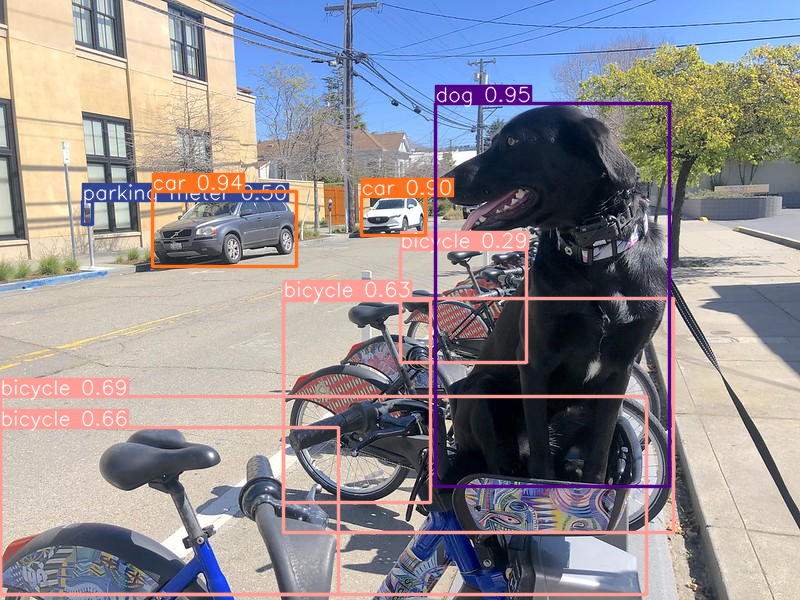

In [145]:
Image.fromarray(res[0].plot()[:, :, ::-1])

# Optimize model using NNCF Post-training Quantization API
NNCF provides a suite of advanced algorithms for Neural Networks inference optimization in OpenVINO with minimal accuracy drop. We will use 8-bit quantization in post-training mode (without the fine-tuning pipeline) to optimize YOLOv10.

The optimization process contains the following steps:

- Create a Dataset for quantization.
- Run nncf.quantize for getting an optimized model.
- Serialize OpenVINO IR model, using the openvino.save_model function.

In [124]:
import ipywidgets as widgets

int8_model_det_path = models_dir / "int8" / f"{model_name}_openvino_model/{model_name}.xml"
ov_yolo_int8_model = None

to_quantize = widgets.Checkbox(
    value=True,
    description="Quantization",
    disabled=False,
)

to_quantize

Checkbox(value=True, description='Quantization')

In [125]:
# Fetch skip_kernel_extension module
r = requests.get(
    url="https://raw.githubusercontent.com/openvinotoolkit/openvino_notebooks/latest/utils/skip_kernel_extension.py",
)
open("skip_kernel_extension.py", "w").write(r.text)

%load_ext skip_kernel_extension

The skip_kernel_extension extension is already loaded. To reload it, use:
  %reload_ext skip_kernel_extension


# Prepare Quantization Dataset


For starting quantization, we need to prepare dataset. We will use validation subset from MS COCO dataset for model quantization and Ultralytics validation data loader for preparing input data.
# CoCo Dataset
https://cocodataset.org/


In [31]:
%%skip not $to_quantize.value

from zipfile import ZipFile

from ultralytics.data.utils import DATASETS_DIR

if not int8_model_det_path.exists():

    DATA_URL = "http://images.cocodataset.org/zips/val2017.zip"
    LABELS_URL = "https://github.com/ultralytics/yolov5/releases/download/v1.0/coco2017labels-segments.zip"
    CFG_URL = "https://raw.githubusercontent.com/ultralytics/ultralytics/v8.1.0/ultralytics/cfg/datasets/coco.yaml"
    
    OUT_DIR = DATASETS_DIR
    
    DATA_PATH = OUT_DIR / "val2017.zip"
    LABELS_PATH = OUT_DIR / "coco2017labels-segments.zip"
    CFG_PATH = OUT_DIR / "coco.yaml"
    
    download_file(DATA_URL, DATA_PATH.name, DATA_PATH.parent)
    download_file(LABELS_URL, LABELS_PATH.name, LABELS_PATH.parent)
    download_file(CFG_URL, CFG_PATH.name, CFG_PATH.parent)
    
    if not (OUT_DIR / "coco/labels").exists():
        with ZipFile(LABELS_PATH, "r") as zip_ref:
            zip_ref.extractall(OUT_DIR)
        with ZipFile(DATA_PATH, "r") as zip_ref:
            zip_ref.extractall(OUT_DIR / "coco/images")

D:\repos\openvino\datasets\val2017.zip:   0%|          | 0.00/778M [00:00<?, ?B/s]

D:\repos\openvino\datasets\coco2017labels-segments.zip:   0%|          | 0.00/169M [00:00<?, ?B/s]

D:\repos\openvino\datasets\coco.yaml:   0%|          | 0.00/1.28k [00:00<?, ?B/s]

In [32]:
%%skip not $to_quantize.value

from ultralytics.utils import DEFAULT_CFG
from ultralytics.cfg import get_cfg
from ultralytics.data.converter import coco80_to_coco91_class
from ultralytics.data.utils import check_det_dataset

if not int8_model_det_path.exists():
    args = get_cfg(cfg=DEFAULT_CFG)
    args.data = str(CFG_PATH)
    det_validator = ov_yolo_model.task_map[ov_yolo_model.task]["validator"](args=args)
    
    det_validator.data = check_det_dataset(args.data)
    det_validator.stride = 32
    det_data_loader = det_validator.get_dataloader(OUT_DIR / "coco", 1)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 755k/755k [00:00<00:00, 2.64MB/s]
val: Scanning D:\repos\openvino\datasets\coco\labels\val2017... 4952 images, 48 backgrounds, 0 corrupt: 100%|██████████| 5000/5000 [00:19<00:00, 256.67it/s]


val: New cache created: D:\repos\openvino\datasets\coco\labels\val2017.cache


In [126]:
DEFAULT_CFG

namespace(task='detect',
          mode='train',
          model=None,
          data=None,
          epochs=100,
          time=None,
          patience=100,
          batch=16,
          imgsz=640,
          save=True,
          save_period=-1,
          val_period=1,
          cache=False,
          device=None,
          workers=8,
          project=None,
          name=None,
          exist_ok=False,
          pretrained=True,
          optimizer='auto',
          verbose=True,
          seed=0,
          deterministic=True,
          single_cls=False,
          rect=False,
          cos_lr=False,
          close_mosaic=10,
          resume=False,
          amp=True,
          fraction=1.0,
          profile=False,
          freeze=None,
          multi_scale=False,
          overlap_mask=True,
          mask_ratio=4,
          dropout=0.0,
          val=True,
          split='val',
          save_json=False,
          save_hybrid=False,
          conf=None,
          iou=0.7,
   

In [43]:
%pip install -q "nncf>=2.11.0"

Note: you may need to restart the kernel to use updated packages.


In [44]:
%%skip not $to_quantize.value

import nncf
from typing import Dict


def transform_fn(data_item:Dict):
    """
    Quantization transform function. Extracts and preprocess input data from dataloader item for quantization.
    Parameters:
       data_item: Dict with data item produced by DataLoader during iteration
    Returns:
        input_tensor: Input data for quantization
    """
    input_tensor = det_validator.preprocess(data_item)['img'].numpy()
    return input_tensor

if not int8_model_det_path.exists():
    quantization_dataset = nncf.Dataset(det_data_loader, transform_fn)

INFO:nncf:NNCF initialized successfully. Supported frameworks detected: torch, onnx, openvino


# Quantize and Save INT8 model


The nncf.quantize function provides an interface for model quantization. It requires an instance of the OpenVINO Model and quantization dataset. Optionally, some additional parameters for the configuration quantization process (number of samples for quantization, preset, ignored scope, etc.) can be provided. YOLOv10 model contains non-ReLU activation functions, which require asymmetric quantization of activations. To achieve a better result, we will use a mixed quantization preset. It provides symmetric quantization of weights and asymmetric quantization of activations.

In [127]:
nncf.QuantizationPreset.MIXED

<QuantizationPreset.MIXED: 'mixed'>

In [45]:
%%skip not $to_quantize.value

import shutil

if not int8_model_det_path.exists():
    quantized_det_model = nncf.quantize(
        ov_model,
        quantization_dataset,
        preset=nncf.QuantizationPreset.MIXED,
    )

    ov.save_model(quantized_det_model,  int8_model_det_path)
    shutil.copy(ov_model_path.parent / "metadata.yaml", int8_model_det_path.parent / "metadata.yaml")

Output()

C:\Users\User\.conda\envs\openvino\Lib\site-packages\nncf\tensor\tensor.py:100: RuntimeWarning: invalid value encountered in multiply
  return Tensor(self.data * unwrap_tensor_data(other))
C:\Users\User\.conda\envs\openvino\Lib\site-packages\nncf\tensor\tensor.py:100: RuntimeWarning: invalid value encountered in multiply
  return Tensor(self.data * unwrap_tensor_data(other))
C:\Users\User\.conda\envs\openvino\Lib\site-packages\nncf\tensor\tensor.py:100: RuntimeWarning: invalid value encountered in multiply
  return Tensor(self.data * unwrap_tensor_data(other))
C:\Users\User\.conda\envs\openvino\Lib\site-packages\nncf\tensor\tensor.py:100: RuntimeWarning: invalid value encountered in multiply
  return Tensor(self.data * unwrap_tensor_data(other))
C:\Users\User\.conda\envs\openvino\Lib\site-packages\nncf\tensor\tensor.py:100: RuntimeWarning: invalid value encountered in multiply
  return Tensor(self.data * unwrap_tensor_data(other))


Output()

In [129]:
%%skip not $to_quantize.value
ov_yolo_int8_model = YOLOv10(int8_model_det_path.parent, task="detect")

In [130]:
%%skip not $to_quantize.value
res = ov_yolo_int8_model(IMAGE_PATH, iou=0.15, conf=0.2)

Loading models\int8\yolov10x_openvino_model for OpenVINO inference...
Using OpenVINO LATENCY mode for batch=1 inference...

image 1/1 D:\repos\openvino\data\coco_bike.jpg: 640x640 6 bicycles, 2 cars, 1 parking meter, 1 dog, 3732.7ms
Speed: 15.0ms preprocess, 3732.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


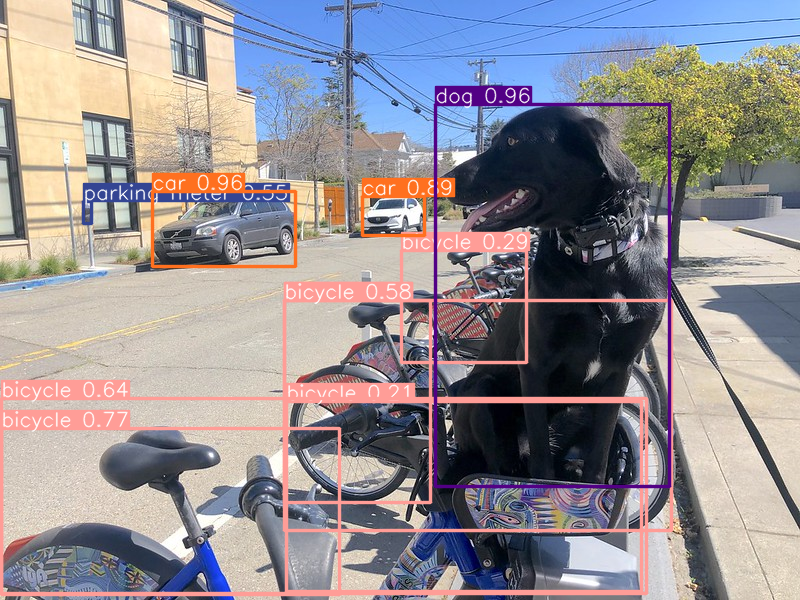

In [131]:
Image.fromarray(res[0].plot()[:, :, ::-1])

In [132]:
%%skip not $to_quantize.value

device

In [135]:
%%skip not $to_quantize.value

ov_config = {}
if "GPU" in device.value or "NPU" in device.value:
    ov_model.reshape({0: [1, 3, 640, 640]})
ov_config = {}
if "GPU" in device.value:
    ov_config = {"GPU_DISABLE_WINOGRAD_CONVOLUTION": "YES"}

quantized_det_model = core.read_model(int8_model_det_path)
quantized_det_compiled_model = core.compile_model(quantized_det_model, device.value, ov_config)

ov_yolo_int8_model.predictor.model.ov_compiled_model = quantized_det_compiled_model

res = ov_yolo_int8_model(IMAGE_PATH,  iou=0.15, conf=0.2)


image 1/1 D:\repos\openvino\data\coco_bike.jpg: 640x640 6 bicycles, 2 cars, 1 parking meter, 1 dog, 3639.0ms
Speed: 13.0ms preprocess, 3639.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


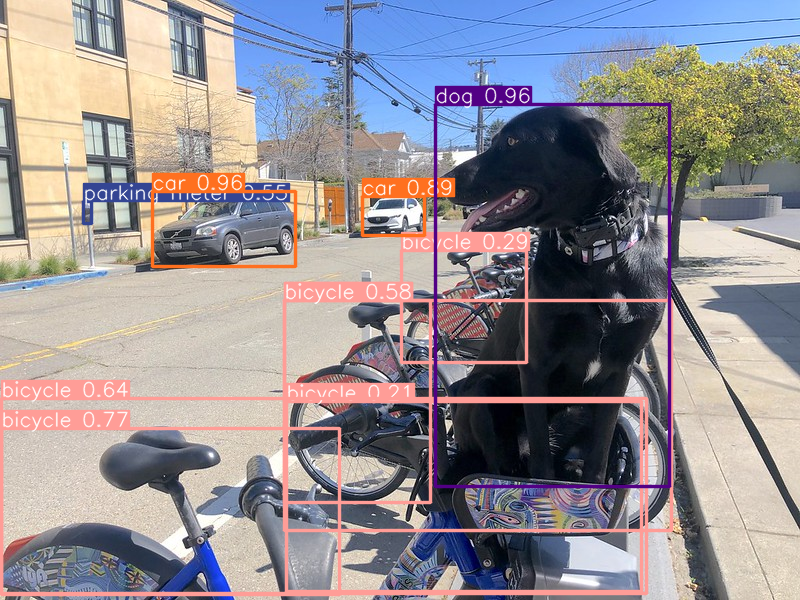

In [136]:
Image.fromarray(res[0].plot()[:, :, ::-1])

# Compare the Original and Quantized Models
# Model size

In [146]:
ov_model_weights = ov_model_path.with_suffix(".bin")
print(f"Size of FP16 model is {ov_model_weights.stat().st_size / 1024 / 1024:.2f} MB")
if int8_model_det_path.exists():
    ov_int8_weights = int8_model_det_path.with_suffix(".bin")
    print(f"Size of model with INT8 compressed weights is {ov_int8_weights.stat().st_size / 1024 / 1024:.2f} MB")
    print(f"Compression rate for INT8 model: {ov_model_weights.stat().st_size / ov_int8_weights.stat().st_size:.3f}")

Size of FP16 model is 56.22 MB
Size of model with INT8 compressed weights is 28.58 MB
Compression rate for INT8 model: 1.967


# Performance
# FP16 model performance

In [147]:
!benchmark_app -m $ov_model_path -d $device.value -api async -shape "[1,3,640,640]" -t 15

[Step 1/11] Parsing and validating input arguments
[ INFO ] Parsing input parameters
[Step 2/11] Loading OpenVINO Runtime
[ INFO ] OpenVINO:
[ INFO ] Build ................................. 2024.2.0-15519-5c0f38f83f6-releases/2024/2
[ INFO ] 
[ INFO ] Device info:
[ INFO ] CPU
[ INFO ] Build ................................. 2024.2.0-15519-5c0f38f83f6-releases/2024/2
[ INFO ] 
[ INFO ] 
[Step 3/11] Setting device configuration
[ WARNING ] Performance hint was not explicitly specified in command line. Device(CPU) performance hint will be set to PerformanceMode.THROUGHPUT.
[Step 4/11] Reading model files
[ INFO ] Loading model files
[ INFO ] Read model took 155.49 ms
[ INFO ] Original model I/O parameters:
[ INFO ] Model inputs:
[ INFO ]     x (node: x) : f32 / [...] / [?,3,?,?]
[ INFO ] Model outputs:
[ INFO ]     ***NO_NAME*** (node: __module.model.23/aten::cat/Concat_8) : f32 / [...] / [?,300,6]
[Step 5/11] Resizing model to match image sizes and given batch
[ INFO ] Model batch size:

In [55]:
# Int8 model performance

In [148]:
if int8_model_det_path.exists():
    !benchmark_app -m $int8_model_det_path -d $device.value -api async -shape "[1,3,640,640]" -t 15

[Step 1/11] Parsing and validating input arguments
[ INFO ] Parsing input parameters
[Step 2/11] Loading OpenVINO Runtime
[ INFO ] OpenVINO:
[ INFO ] Build ................................. 2024.2.0-15519-5c0f38f83f6-releases/2024/2
[ INFO ] 
[ INFO ] Device info:
[ INFO ] CPU
[ INFO ] Build ................................. 2024.2.0-15519-5c0f38f83f6-releases/2024/2
[ INFO ] 
[ INFO ] 
[Step 3/11] Setting device configuration
[ WARNING ] Performance hint was not explicitly specified in command line. Device(CPU) performance hint will be set to PerformanceMode.THROUGHPUT.
[Step 4/11] Reading model files
[ INFO ] Loading model files
[ INFO ] Read model took 269.54 ms
[ INFO ] Original model I/O parameters:
[ INFO ] Model inputs:
[ INFO ]     x (node: x) : f32 / [...] / [?,3,?,?]
[ INFO ] Model outputs:
[ INFO ]     ***NO_NAME*** (node: __module.model.23/aten::cat/Concat_8) : f32 / [...] / [?,300,6]
[Step 5/11] Resizing model to match image sizes and given batch
[ INFO ] Model batch size:

In [149]:
import collections
import time
from IPython import display
import cv2
import numpy as np


# Main processing function to run object detection.
def run_object_detection(
    source=0,
    flip=False,
    use_popup=False,
    skip_first_frames=0,
    det_model=ov_yolo_int8_model,
    device=device.value,
):
    player = None
    try:
        # Create a video player to play with target fps.
        player = VideoPlayer(source=source, flip=flip, fps=30, skip_first_frames=skip_first_frames)
        # Start capturing.
        player.start()
        if use_popup:
            title = "Press ESC to Exit"
            cv2.namedWindow(winname=title, flags=cv2.WINDOW_GUI_NORMAL | cv2.WINDOW_AUTOSIZE)

        processing_times = collections.deque()
        while True:
            # Grab the frame.
            frame = player.next()
            if frame is None:
                print("Source ended")
                break
            # If the frame is larger than full HD, reduce size to improve the performance.
            scale = 1280 / max(frame.shape)
            if scale < 1:
                frame = cv2.resize(
                    src=frame,
                    dsize=None,
                    fx=scale,
                    fy=scale,
                    interpolation=cv2.INTER_AREA,
                )
            # Get the results.
            input_image = np.array(frame)

            start_time = time.time()
            detections = det_model(input_image, iou=0.45, conf=0.2, verbose=False)
            stop_time = time.time()
            frame = detections[0].plot()

            processing_times.append(stop_time - start_time)
            # Use processing times from last 200 frames.
            if len(processing_times) > 200:
                processing_times.popleft()

            _, f_width = frame.shape[:2]
            # Mean processing time [ms].
            processing_time = np.mean(processing_times) * 1000
            fps = 1000 / processing_time
            cv2.putText(
                img=frame,
                text=f"Inference time: {processing_time:.1f}ms ({fps:.1f} FPS)",
                org=(20, 40),
                fontFace=cv2.FONT_HERSHEY_COMPLEX,
                fontScale=f_width / 1000,
                color=(0, 0, 255),
                thickness=1,
                lineType=cv2.LINE_AA,
            )
            # Use this workaround if there is flickering.
            if use_popup:
                cv2.imshow(winname=title, mat=frame)
                key = cv2.waitKey(1)
                # escape = 27
                if key == 27:
                    break
            else:
                # Encode numpy array to jpg.
                _, encoded_img = cv2.imencode(ext=".jpg", img=frame, params=[cv2.IMWRITE_JPEG_QUALITY, 100])
                # Create an IPython image.
                i = display.Image(data=encoded_img)
                # Display the image in this notebook.
                display.clear_output(wait=True)
                display.display(i)
    # ctrl-c
    except KeyboardInterrupt:
        print("Interrupted")
    # any different error
    except RuntimeError as e:
        print(e)
    finally:
        if player is not None:
            # Stop capturing.
            player.stop()
        if use_popup:
            cv2.destroyAllWindows()

In [150]:
use_int8 = widgets.Checkbox(
    value=ov_yolo_int8_model is not None,
    description="Use int8 model",
    disabled=ov_yolo_int8_model is None,
)

use_int8

Checkbox(value=True, description='Use int8 model')

In [151]:
WEBCAM_INFERENCE = False

if WEBCAM_INFERENCE:
    VIDEO_SOURCE = 0  # Webcam
else:
    download_file(
        "https://storage.openvinotoolkit.org/repositories/openvino_notebooks/data/data/video/people.mp4",
        directory="data",
    )
    VIDEO_SOURCE = "data/people.mp4"

'data\people.mp4' already exists.


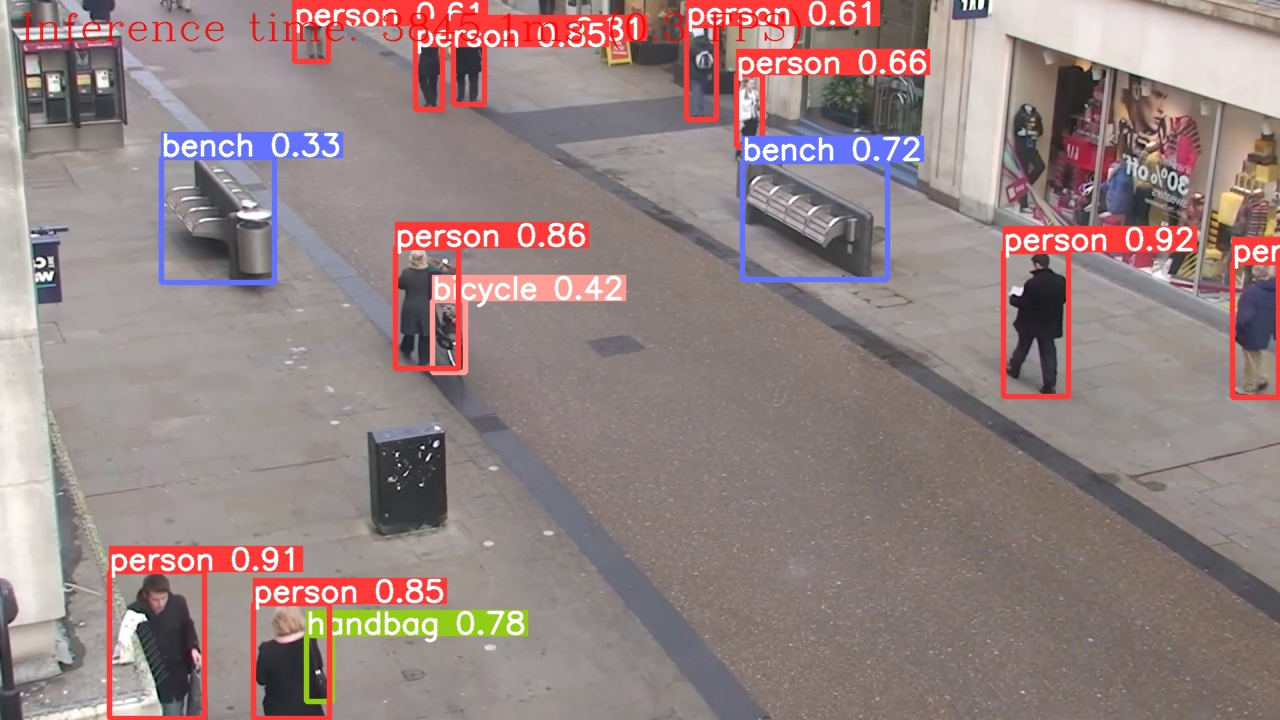

Source ended


In [152]:
run_object_detection(
    det_model=ov_yolo_model if not use_int8.value else ov_yolo_int8_model,
    source=VIDEO_SOURCE,
    flip=True,
    use_popup=False,
)

In [153]:
# WebCam

In [154]:
WEBCAM_INFERENCE = True

if WEBCAM_INFERENCE:
    VIDEO_SOURCE = 0  # Webcam
else:
    download_file(
        "https://storage.openvinotoolkit.org/repositories/openvino_notebooks/data/data/video/people.mp4",
        directory="data",
    )
    VIDEO_SOURCE = "data/people.mp4"

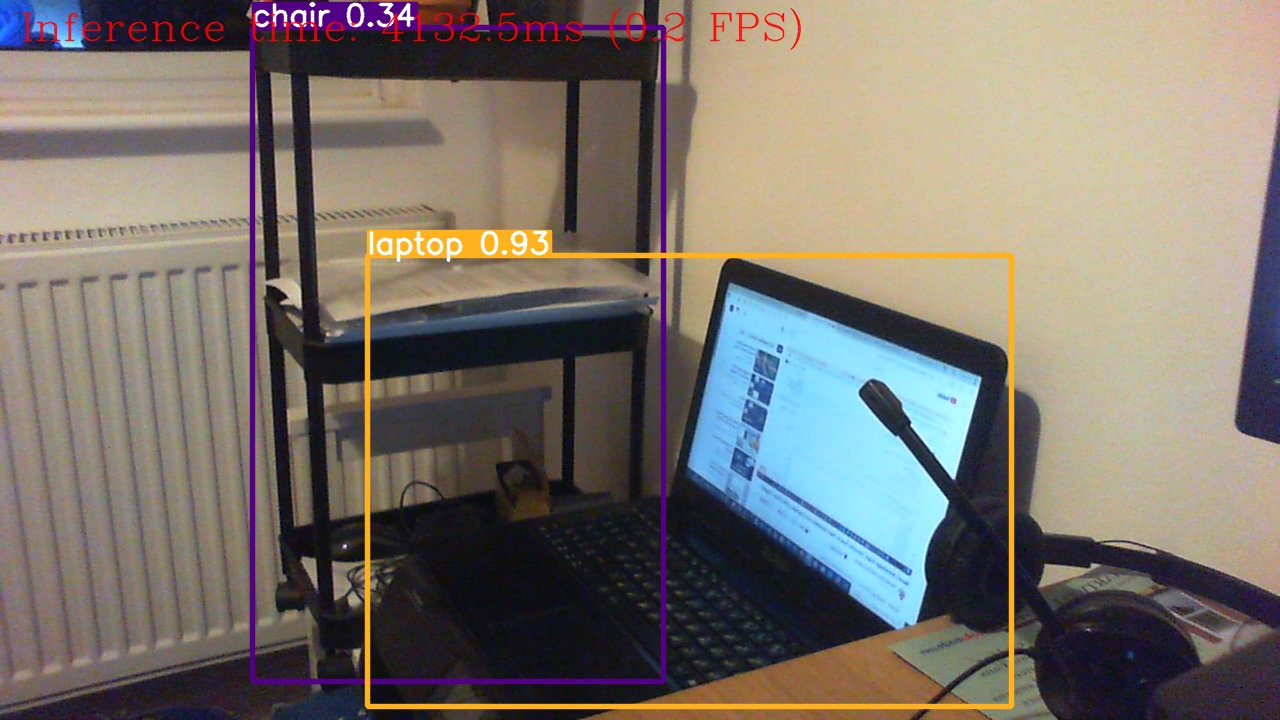

Interrupted


In [155]:
run_object_detection(
    det_model=ov_yolo_model if not use_int8.value else ov_yolo_int8_model,
    source=VIDEO_SOURCE,
    flip=True,
    use_popup=False,
)

# Classification

In [156]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n-cls.pt")  # load an official model


# Predict with the model
results = model("https://ultralytics.com/images/bus.jpg")  # predict on an image


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 D:\repos\openvino\bus.jpg: 224x224 minibus 0.50, police_van 0.29, trolleybus 0.05, golfcart 0.02, jinrikisha 0.02, 32.0ms
Speed: 27.0ms preprocess, 32.0ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)


In [160]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: None
 keypoints: None
 masks: None
 names: {0: 'tench', 1: 'goldfish', 2: 'great_white_shark', 3: 'tiger_shark', 4: 'hammerhead', 5: 'electric_ray', 6: 'stingray', 7: 'cock', 8: 'hen', 9: 'ostrich', 10: 'brambling', 11: 'goldfinch', 12: 'house_finch', 13: 'junco', 14: 'indigo_bunting', 15: 'robin', 16: 'bulbul', 17: 'jay', 18: 'magpie', 19: 'chickadee', 20: 'water_ouzel', 21: 'kite', 22: 'bald_eagle', 23: 'vulture', 24: 'great_grey_owl', 25: 'European_fire_salamander', 26: 'common_newt', 27: 'eft', 28: 'spotted_salamander', 29: 'axolotl', 30: 'bullfrog', 31: 'tree_frog', 32: 'tailed_frog', 33: 'loggerhead', 34: 'leatherback_turtle', 35: 'mud_turtle', 36: 'terrapin', 37: 'box_turtle', 38: 'banded_gecko', 39: 'common_iguana', 40: 'American_chameleon', 41: 'whiptail', 42: 'agama', 43: 'frilled_lizard', 44: 'alligator_lizard', 45: 'Gila_monster', 46: 'green_lizard', 47: 'African_chameleon', 48: 'Komodo_dragon', 49: 'Afri

In [157]:
# View results
for r in results:
    print(r.probs)  # print the Probs object containing the detected class probabilities

ultralytics.engine.results.Probs object with attributes:

data: tensor([1.2584e-08, 2.6674e-07, 3.2614e-05, 4.9419e-06, 3.9684e-05, 1.2948e-06, 2.9295e-07, 3.8941e-06, 2.5282e-08, 1.4084e-06, 1.3342e-09, 1.8237e-08, 2.9037e-07, 5.8839e-10, 1.3855e-05, 8.7818e-09, 6.0015e-09, 9.1992e-06, 1.2072e-06, 8.5269e-09, 1.9966e-10, 6.4927e-09, 6.5911e-07, 6.4309e-08, 4.0155e-08, 2.0573e-08,
        1.4663e-08, 1.2768e-08, 1.0130e-08, 9.9042e-07, 5.5810e-09, 6.8596e-09, 4.3163e-08, 6.5285e-06, 3.3849e-05, 1.1655e-08, 2.9302e-07, 6.4629e-08, 5.3154e-09, 1.6773e-06, 2.1531e-08, 6.8605e-08, 3.8473e-07, 2.4426e-07, 2.4187e-08, 1.0924e-06, 3.5715e-08, 3.7302e-09, 2.7671e-07, 3.1964e-08, 5.2351e-07, 3.4983e-05,
        1.4070e-07, 1.6333e-08, 2.1714e-07, 2.2762e-08, 3.6365e-08, 2.0483e-08, 2.0985e-08, 3.0368e-08, 1.9945e-06, 2.4429e-06, 1.2882e-06, 3.9261e-07, 8.4564e-08, 1.2576e-05, 4.2215e-09, 1.9869e-06, 2.0571e-08, 1.2875e-07, 6.1494e-09, 3.2228e-07, 7.4871e-08, 3.4188e-07, 3.3957e-08, 1.4860e-08, 

In [158]:
for x in results:
    for y in x.probs.top5:
        print(results[0].names.get(y))

minibus
police_van
trolleybus
golfcart
jinrikisha


# Image Segmentation

In [161]:
# plot and visualize images in a 2x2 grid
import matplotlib.pyplot as plt
import os
import glob
def visualize(result_dir):
  """
  Function accepts a list of images and plots them in a 2x2 grid.
  """
  plt.figure(figsize=(20,12))
  image_names = glob.glob(os.path.join(result_dir, '*.jpg'))
  for i, image_name in enumerate(image_names):
    image = plt.imread(image_name)
    plt.subplot(3, 2, i+1)
    plt.imshow(image)
    plt.axis('off')
  plt.tight_layout()
  plt.show()

In [162]:
!yolo task=segment mode=predict model=yolov8x-seg.pt source='images' name=yolov8x_seg

Ultralytics YOLOv8.1.34 ðŸš€ Python-3.11.9 torch-2.2.2+cpu CPU (Intel Core(TM) i7-10870H 2.20GHz)
YOLOv8x-seg summary (fused): 295 layers, 71797696 parameters, 0 gradients, 344.1 GFLOPs

image 1/6 D:\repos\openvino\images\2008_000183.jpg: 640x352 1 dog, 1369.4ms
image 2/6 D:\repos\openvino\images\2008_000562.jpg: 480x640 2 persons, 1 bicycle, 1 car, 1 backpack, 1804.0ms
image 3/6 D:\repos\openvino\images\2008_000880.jpg: 448x640 8 persons, 2 cars, 1 truck, 2 horses, 1 cell phone, 1748.0ms
image 4/6 D:\repos\openvino\images\2008_001782.jpg: 480x640 4 persons, 1 sports ball, 1 tennis racket, 1719.9ms
image 5/6 D:\repos\openvino\images\bus.jpg: 640x480 5 persons, 1 bus, 1803.9ms
image 6/6 D:\repos\openvino\images\coco.jpg: 480x640 8 cars, 1 truck, 1 dog, 1684.9ms
Speed: 7.4ms preprocess, 1688.3ms inference, 13.7ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs\segment\yolov8x_seg4
ðŸ’¡ Learn more at https://docs.ultralytics.com/modes/predict


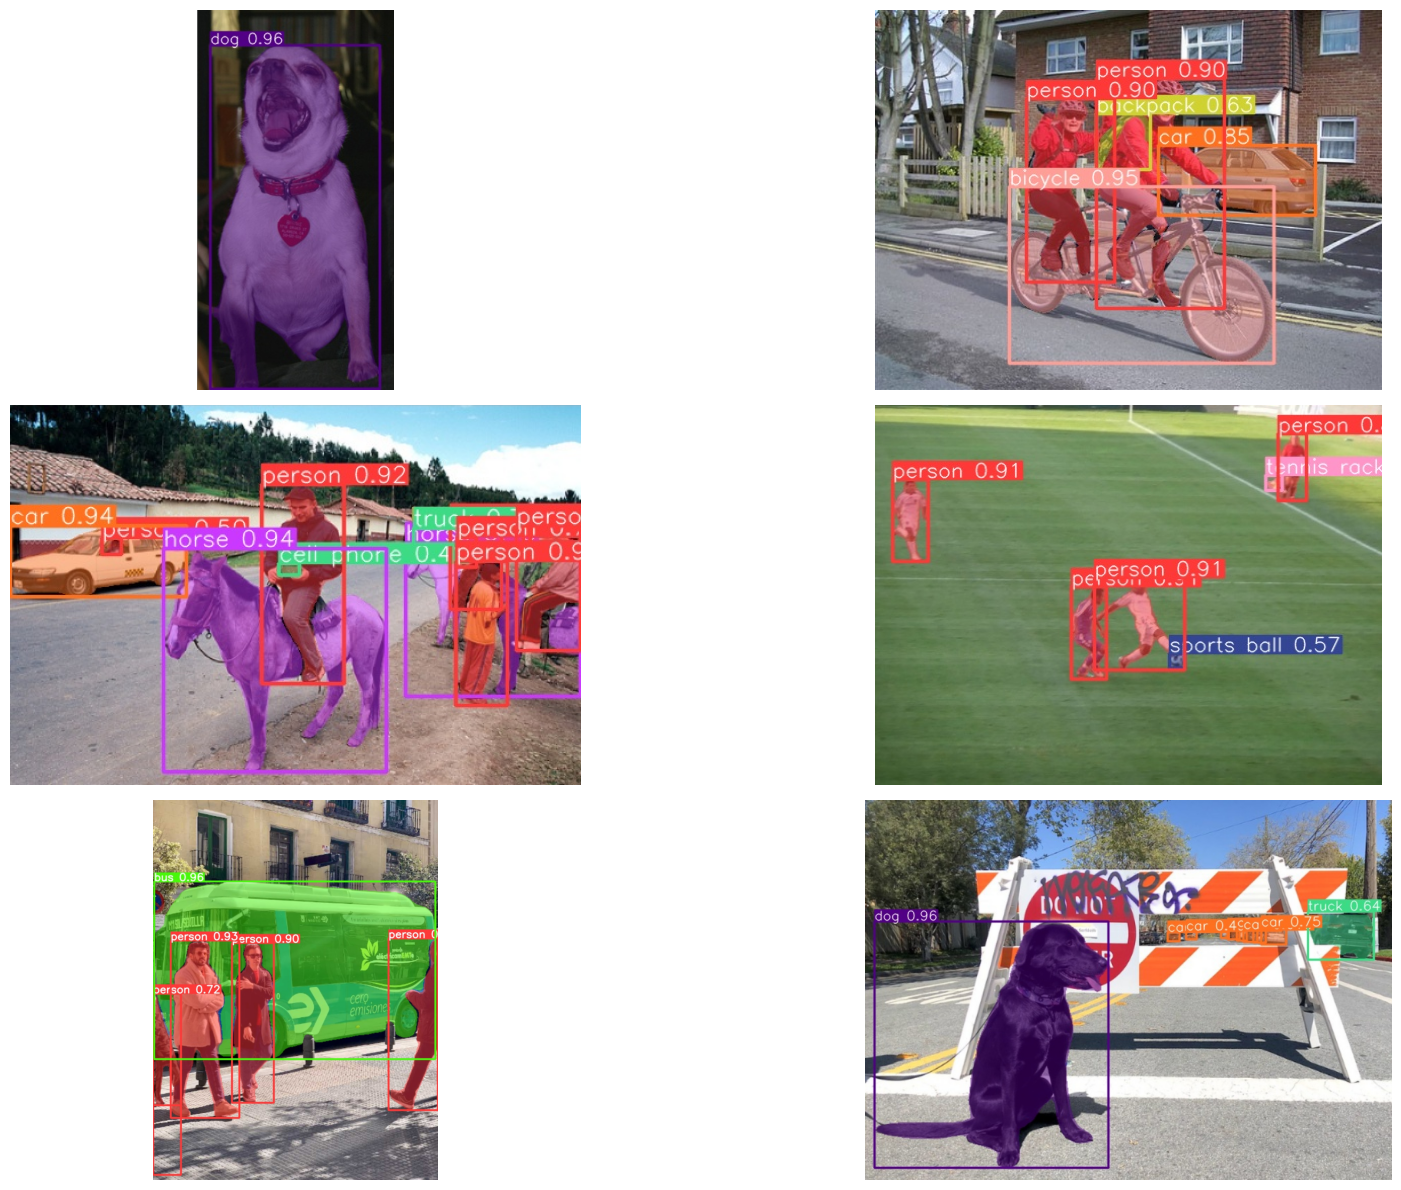

In [78]:
visualize('runs/segment/yolov8x_seg/')